# Multiple Linear Regression

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Import data file

dataset=pd.read_csv('insurance.csv')

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Encoding categorical data

In [3]:
objList = dataset.select_dtypes(include = "object").columns
print (objList)

Index(['sex', 'smoker', 'region'], dtype='object')


In [4]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    dataset[feat] = le.fit_transform(dataset[feat].astype(str))

print (dataset.info())

dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB
None


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Create X and y arrays

In [5]:
# Create X set and y set. They are arrays and vectors
#X=dataset.iloc[:,0].values
X=dataset.iloc[:,:-1].values
print(X)
y=dataset.iloc[:,-1].values

print(y)

[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]
 [61.    0.   29.07  0.    1.    1.  ]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


## Creating Training and Test Data Sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=44)

## Training Multiple Linear Regression on Training set

In [7]:
from sklearn.linear_model import LinearRegression #Calling LinearRegression Class
regressor=LinearRegression() #Creating an object of LinearRegression
regressor.fit(X_train, y_train) #Method of the linear regression class
regressor.score(X_train,y_train)
# Printing R^2

0.7497846167934157

## Predicting Test set results

In [8]:
y_pred=regressor.predict(X_test) # Predicting values on test data
#print(y_pred)

In [9]:
np.set_printoptions(precision=2) 
#  To display with two decimal points all printed values

### Representation of Y_pred vs Y_test in simple scatter plot and line representation.

The gold line represents an ideal match between "measuring devices"
The blue line represents the actual match between Y_pred and Y_test.

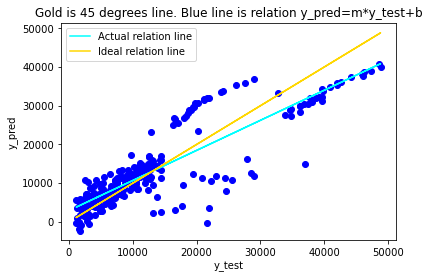

Slope: m= 0.78
Intercept: b= 2924.65


In [10]:
plt.scatter(y_test, y_pred,  color='blue')
m, b = np.polyfit(y_test, y_pred, 1) # 1 is the degree of the polynomial to fit.
plt.plot(y_test, m*y_test+b, color='cyan', label="Actual relation line")
plt.plot(y_test, y_test, color='gold', label="Ideal relation line")
plt.title("Gold is 45 degrees line. Blue line is relation y_pred=m*y_test+b")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.legend()
plt.show()
print("Slope: m=","{:.2f}".format(m))
print("Intercept: b=","{:.2f}".format(b))

### Calculating Regression model's precision (Aspect Ratio: AR)

In [11]:
#Estimating correlation coefficient and R^2 between Y_pred and Y_test

correlation_matrix = np.corrcoef(y_test, y_pred)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("R-squared between y_pred and y_test: ", "{:.2f}".format(r_squared))
print("Correlation between y_pred and y_test: ","{:.2f}".format(correlation_xy))

R-squared between y_pred and y_test:  0.75
Correlation between y_pred and y_test:  0.87


In [12]:
# Aspect ratio calculation (precision)
AR=(1-correlation_xy)**(0.5-1)
print(" 'Aspect Ratio': ", "{:.2f}".format(AR))

 'Aspect Ratio':  2.76


A good correlation coefficient is >=0.98, yielding an aspect ratio of 7 to 1 (minimum suggested when comparing a measuring device (y_test or the regression model) against a master measuring device (y_test).

## Obtaining model coefficients

In [13]:
# Obtaining the model equation
print(regressor.coef_)
print(regressor.intercept_)

[  254.21  -233.99   345.45   502.46 23966.6   -344.46]
-12095.637432727546


### Explained variance score for Multiple Regression

The Explained Variance Score (EVS) best possible value is 1.0. Lower values are worse.

$EVS=1-\frac{var(y_{test}-y_{pred})}{var(y_{test})}$

In [14]:
from sklearn.metrics import explained_variance_score
EVS=explained_variance_score(y_test, y_pred, multioutput='uniform_average')
print("EVS: ","{:.2f}".format(EVS))

EVS:  0.75


In [15]:
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_notebook, show
output_notebook()
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

Loading BokehJS ...

In [16]:
#Setting x axis
x=np.linspace(1,268,268)
#print(x)

### Printing y_pred and y_test 

In [17]:
p1 = figure(title="y_test, y_pred", tools=TOOLS, plot_width=800, plot_height=400)
p1.circle(x, y_test, legend_label="y_test", color="blue", size=10)
p1.asterisk(x, y_pred, legend_label="y_pred", color="green", size=10)
show(p1)

### EDA on dataset

In [18]:
p = figure(title="age vs charges", tools=TOOLS, plot_width=800, plot_height=400)
p.circle(dataset["age"], dataset["charges"], color="blue", size=10)
p.xaxis.axis_label="Age"
p.yaxis.axis_label = 'Charges'
show(p)

In [19]:
p2 = figure(title="sex vs charges", tools=TOOLS, plot_width=800, plot_height=400)
p2.square(dataset["sex"], dataset["charges"], color="blue", size=10)
p2.xaxis.axis_label="Sex"
p2.yaxis.axis_label = 'Charges'
show(p2)

In [20]:
p3 = figure(title="bmi vs charges", tools=TOOLS, plot_width=800, plot_height=400)
p3.asterisk(dataset["bmi"], dataset["charges"], color="blue", size=10)
p3.xaxis.axis_label="BMI"
p3.yaxis.axis_label = 'Charges'
show(p3)

In [21]:
p4 = figure(title="children vs charges", tools=TOOLS, plot_width=800, plot_height=400)
p4.asterisk(dataset["children"], dataset["charges"], color="blue", size=10)
p4.xaxis.axis_label="Children"
p4.yaxis.axis_label = 'Charges'
show(p4)

In [22]:
p5 = figure(title="smoker vs charges", tools=TOOLS, plot_width=800, plot_height=400)
p5.asterisk(dataset["smoker"], dataset["charges"], color="blue", size=10)
p5.xaxis.axis_label="Smoker"
p5.yaxis.axis_label = 'Charges'
show(p5)

In [23]:
p6 = figure(title="region vs charges", tools=TOOLS, plot_width=800, plot_height=400)
p6.asterisk(dataset["region"], dataset["charges"], color="blue", size=10)
p6.xaxis.axis_label="Age"
p6.yaxis.axis_label = 'Charges'
show(p6)

In [24]:
import seaborn as sns
dataset.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


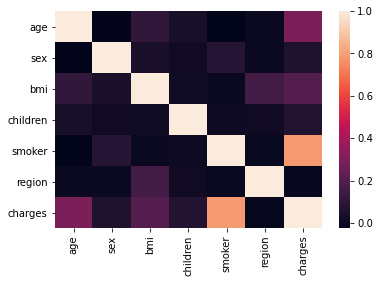

In [25]:
sns.heatmap(dataset.corr());


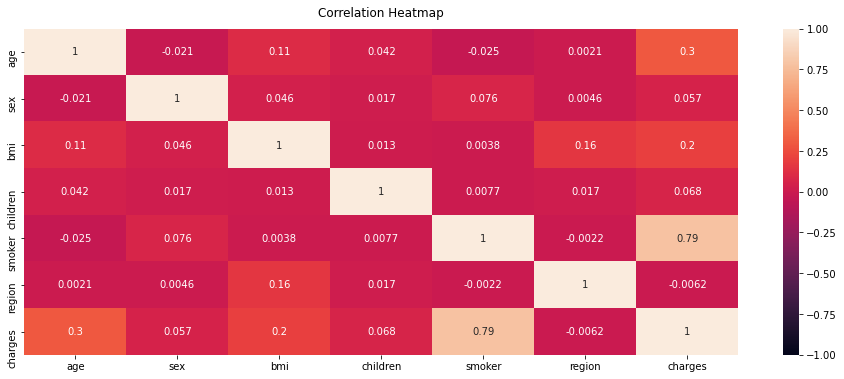

In [26]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);